In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


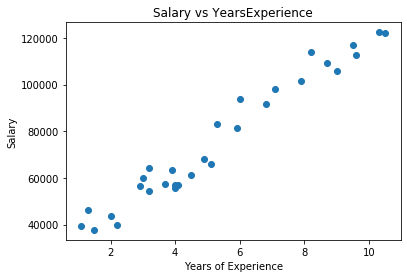

In [4]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Salary vs YearsExperience")
plt.show()

## Divide dataset into features and labels

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Split data into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
'''random_state is basically used for reproducing your problem the same every time it is run.
If you do not use a random_state in train_test_split, every time you make the split you might get
a different set of train and test data points and will not help you in debugging in case you get an
issue.'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 101)

In [10]:
X_train
# X_train.size

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [11]:
y_train
# y_train.size

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [12]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [13]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [15]:
LR.fit(X_train, y_train) # Training/GD

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = LR.predict(X_test)

In [17]:
y_pred

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [18]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [19]:
diff = y_test - y_pred

In [20]:
res_df = pd.concat([pd.Series(y_test), pd.Series(y_pred), pd.Series(diff)], axis = 1)
res_df.columns = ['Actual_Data', 'Prediction_Data', 'Diff']

In [21]:
res_df

,Actual_Data,Prediction_Data,Diff
0,91738.0,91477.927966,260.072034
1,109431.0,109893.228025,-462.228025
2,54445.0,56585.780487,-2140.780487
3,81363.0,82754.891096,-1391.891096
4,37731.0,40108.933066,-2377.933066
5,112635.0,118616.264895,-5981.264895
6,116969.0,117647.038576,-678.038576
7,66029.0,75001.080545,-8972.080545
8,105582.0,112800.906981,-7218.906981
9,122391.0,125400.849127,-3009.849127


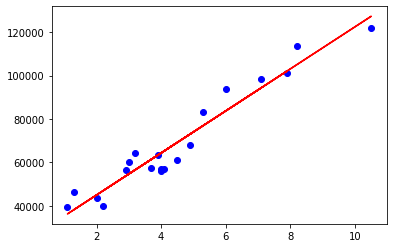

In [22]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, LR.predict(X_train), color = 'red')
plt.show()